<a href="https://colab.research.google.com/github/Ductrinh01/AI_Exercises_CNN/blob/main/BT_10MonAn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

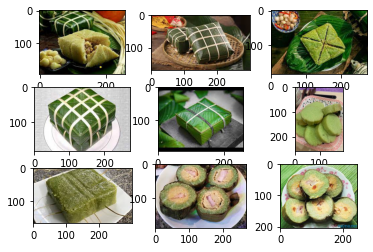

In [1]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

folder= '/content/drive/MyDrive/Data_AI/Mon_an_VN/'
for i in range(9):
  plt.subplot(330+i+1)
  filename = folder+'BanhChung.'+str(i+1)+'.jpg'
  image = imread(filename)
  plt.imshow(image)
plt.show()

In [2]:
from os import listdir
from numpy import asarray
from numpy import save
from keras.preprocessing.image import load_img, img_to_array

folder = '/content/drive/MyDrive/Data_AI/Mon_an_VN/'

photos, labels = list(), list()
for file in listdir(folder):
  if file.startswith('BanhChung'):
    output = 0
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('BanhDay'):
    output = 1
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('Banhmi'):
    output = 2
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('BunDauMamTom'):
    output = 3
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('CheBuoi'):
    output = 4
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('ComTam'):
    output = 5
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('Nem'):
    output = 6
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('Pho'):
    output = 7
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('ThitKhoTau'):
    output = 8
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('TrungVitLon'):
    output = 9
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

photos = asarray(photos)
labels = asarray(labels)
print(photos.shape,labels.shape)

save('10foods_photos.npy', photos)
save('10foods_labels.npy', labels)

(100, 200, 200, 3) (100,)


In [7]:
from keras.models import Sequential
from keras.layers import Dense, Activation, BatchNormalization, Dropout, Conv2D, MaxPooling2D, Flatten # BatchNormalization: để dùng GPU ko lỗi

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())

model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))


model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [8]:
 history = model.fit(photos, labels, epochs=50, verbose=1)

Epoch 1/50
4/4 [==============================] - 1s 45ms/step - loss: 8773.1279 - accuracy: 0.0900
Epoch 2/50
4/4 [==============================] - 0s 36ms/step - loss: 4214.4941 - accuracy: 0.0900
Epoch 3/50
4/4 [==============================] - 0s 35ms/step - loss: 185.4268 - accuracy: 0.2000
Epoch 4/50
4/4 [==============================] - 0s 35ms/step - loss: 27.5740 - accuracy: 0.2500
Epoch 5/50
4/4 [==============================] - 0s 36ms/step - loss: 11.5621 - accuracy: 0.4100
Epoch 6/50
4/4 [==============================] - 0s 36ms/step - loss: 1.5662 - accuracy: 0.6900
Epoch 7/50
4/4 [==============================] - 0s 36ms/step - loss: 0.6916 - accuracy: 0.7600
Epoch 8/50
4/4 [==============================] - 0s 34ms/step - loss: 0.3010 - accuracy: 0.9000
Epoch 9/50
4/4 [==============================] - 0s 36ms/step - loss: 0.1241 - accuracy: 0.9700
Epoch 10/50
4/4 [==============================] - 0s 34ms/step - loss: 0.1454 - accuracy: 0.9500
Epoch 11/50
4/4 [==

In [9]:
model.evaluate(photos,labels)

4/4 [==============================] - 0s 19ms/step - loss: 7.1791e-06 - accuracy: 1.0000


[7.1790868787502404e-06, 1.0]

In [10]:
model.save('10Foods_Final.h5')

In [11]:
from keras.models import load_model
models=load_model('10Foods_Final.h5')

In [12]:
classes = ["BanhChung","BanhDay","Banhmi","BunDauMamTom","CheBuoi","ComTam","Nem","Pho","ThitKhoTau","TrungVitLon"]

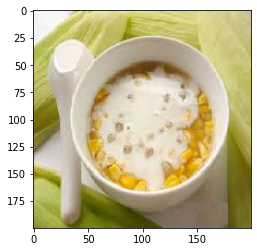

In [16]:
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array

img = load_img('../content/drive/MyDrive/Data_AI/Mon_an_VN/CheBuoi.7.jpg', target_size=(200,200))
plt.imshow(img)

In [17]:
import numpy as np
imgRe = img_to_array(img)
imgRe = imgRe.reshape(1,200,200,3)  
imgRe = imgRe.astype('float32')
imgRe /= 255
y_pred = model.predict(imgRe)
print(y_pred)
y_classes = [np.argmax(element) for element in y_pred]
y_classes
classes[y_classes[0]]

[[0.09827729 0.10184942 0.09855369 0.09861733 0.10736804 0.09602497
  0.09758642 0.1011474  0.09837035 0.1022051 ]]


'CheBuoi'